# Statistical EDA

In [4]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

We will first see first 10 rows of the data to get an idea about the data , find how many rows and columns data contains , find the basic statistical matrics about the data and find missing data

In [5]:
ln=pd.read_csv('datasets/train_u6lujuX_CVtuZ9i.csv')
print(ln.head(10))

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   
5  LP001011   Male     Yes          2      Graduate           Yes   
6  LP001013   Male     Yes          0  Not Graduate            No   
7  LP001014   Male     Yes         3+      Graduate            No   
8  LP001018   Male     Yes          2      Graduate            No   
9  LP001020   Male     Yes          1      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000         

In [6]:
print(ln.shape)

(614, 13)


In [7]:
print(ln.describe())

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


In [8]:
print(ln.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB
None


In [9]:
print(ln['Gender'].value_counts(dropna=False))

Male      489
Female    112
NaN        13
Name: Gender, dtype: int64


In [10]:
print(ln['Education'].value_counts(dropna=False))

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


In [11]:
print(ln['Property_Area'].value_counts(dropna=False))

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


From the exploratory data analysis we find that there are 614 rows and 13 columns ,and has highest no. of missing value is equal to 50 . It has some categorical features as well.

# Graphical Exploratory data analysis

Let explore if both graduate and non graduate people get same amount of loan or not

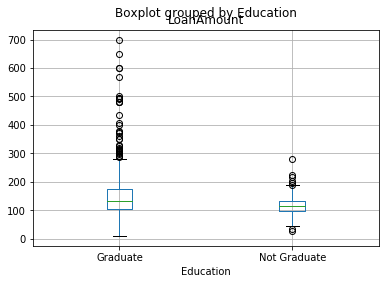

In [12]:
ln.boxplot(column='LoanAmount',by='Education')
plt.show()

Loan amount of both graduate and not graduate are not differ by two much . So loan amount is independent of whether u r graduate or not . Jst a small conclusion is that graduate people can get better loann amount then non graduate.

Now lets think about income of both graduate and non-graduate

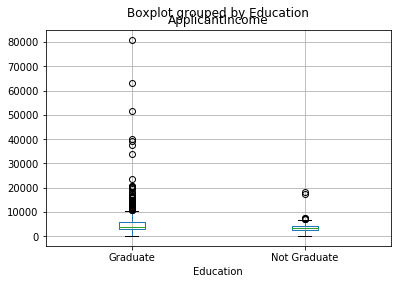

In [13]:
ln.boxplot(column='ApplicantIncome',by='Education')
plt.show()

Income of both graduate and not graduate are not differ by two much . A conclusion can be drawn is that some graduate people earn far better than non graduate people

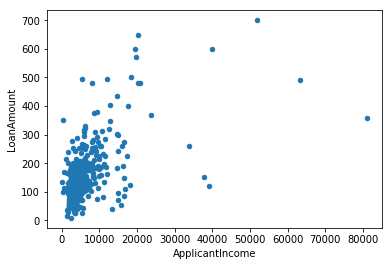

In [14]:
ln.plot(x='ApplicantIncome',y='LoanAmount',kind='scatter')
plt.show()

wooooooooo we get a great result about dataset it is not necessary that if you have a good income u goona get a good loan amount . Loan Amount is independent of applicant income . There are many constraints which decides the loan amount

# Data cleaning and preprocessing data

we will first separate both predictor features and target variables.

In [15]:
print(ln.head(10))

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   
5  LP001011   Male     Yes          2      Graduate           Yes   
6  LP001013   Male     Yes          0  Not Graduate            No   
7  LP001014   Male     Yes         3+      Graduate            No   
8  LP001018   Male     Yes          2      Graduate            No   
9  LP001020   Male     Yes          1      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000         

In [16]:
X_TRAIN=ln.drop(['Loan_ID','Loan_Status'],axis='columns')
Y_TRAIN=ln[['Loan_Status']]

In [17]:
print(X_TRAIN.head(5))

  Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0   Male      No          0      Graduate            No             5849   
1   Male     Yes          1      Graduate            No             4583   
2   Male     Yes          0      Graduate           Yes             3000   
3   Male     Yes          0  Not Graduate            No             2583   
4   Male      No          0      Graduate            No             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0         NaN             360.0             1.0   
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   

  Property_Area  
0         Urban  
1         Rural  
2         Urban  
3         Urban  
4         Urban  


In [18]:
print(Y_TRAIN.head())

  Loan_Status
0           Y
1           N
2           Y
3           Y
4           Y


Now we will find if there are missing values and categorical features present in feature variable or not

In [19]:
print(X_TRAIN.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
dtypes: float64(4), int64(1), object(6)
memory usage: 52.8+ KB
None


So we will first deal with missing values

Gender has 13 missing values and it is categorical in datatype so we will ffill the missing values with most frequent outcome

In [20]:
print(X_TRAIN.Gender.value_counts(dropna=False))

Male      489
Female    112
NaN        13
Name: Gender, dtype: int64


In [21]:
X_TRAIN['Gender']=X_TRAIN['Gender'].fillna('Male')

Married has 3 missing values and it is categorical in datatype so we will ffill the missing values with most frequent outcome

In [22]:
print(X_TRAIN.Married.value_counts(dropna=False))

Yes    398
No     213
NaN      3
Name: Married, dtype: int64


In [23]:
X_TRAIN['Married']=X_TRAIN['Married'].fillna('Yes')

Depenndents has 15 missing values and it is categorical in datatype so we will ffill the missing values with most frequent outcome

In [24]:
print(X_TRAIN.Dependents.value_counts(dropna=False))

0      345
1      102
2      101
3+      51
NaN     15
Name: Dependents, dtype: int64


In [25]:
X_TRAIN['Dependents']=X_TRAIN['Dependents'].fillna(0)

Self Employed has 32 missing values and it is categorical in datatype so we will ffill the missing values with most frequent outcome

In [26]:
X_TRAIN['Self_Employed']=X_TRAIN['Self_Employed'].fillna('No')

Loan Amount has 22 missing values and it is numerical in datatype so we will ffill the missing values with mean of present values

In [27]:
print(X_TRAIN.LoanAmount.value_counts(dropna=False))

NaN       22
 120.0    20
 110.0    17
 100.0    15
 160.0    12
 187.0    12
 128.0    11
 113.0    11
 130.0    10
 96.0      9
 95.0      9
 115.0     8
 112.0     8
 70.0      8
 150.0     7
 125.0     7
 136.0     7
 132.0     7
 104.0     7
 135.0     7
 116.0     6
 81.0      6
 175.0     6
 180.0     6
 144.0     6
 80.0      6
 155.0     6
 90.0      6
 158.0     6
 138.0     6
          ..
 54.0      1
 436.0     1
 250.0     1
 304.0     1
 280.0     1
 42.0      1
 72.0      1
 240.0     1
 214.0     1
 59.0      1
 308.0     1
 236.0     1
 380.0     1
 296.0     1
 208.0     1
 119.0     1
 500.0     1
 246.0     1
 234.0     1
 86.0      1
 230.0     1
 190.0     1
 178.0     1
 218.0     1
 62.0      1
 360.0     1
 53.0      1
 65.0      1
 156.0     1
 89.0      1
Name: LoanAmount, Length: 204, dtype: int64


In [28]:
X_TRAIN['LoanAmount']=X_TRAIN['LoanAmount'].fillna(np.mean(X_TRAIN['LoanAmount']))

Loan Amount term has 14 missing values and it is numerical in datatype so we will ffill the missing values with mean of present values

In [29]:
print(X_TRAIN.Loan_Amount_Term.value_counts(dropna=False))

 360.0    512
 180.0     44
 480.0     15
NaN        14
 300.0     13
 84.0       4
 240.0      4
 120.0      3
 36.0       2
 60.0       2
 12.0       1
Name: Loan_Amount_Term, dtype: int64


In [30]:
X_TRAIN['Loan_Amount_Term']=X_TRAIN['Loan_Amount_Term'].fillna(np.mean(X_TRAIN['Loan_Amount_Term']))

Credit_history has 50 missing values and it is categorical in datatype so we will ffill the missing values with most frequent outcome

In [31]:
print(X_TRAIN.Credit_History.value_counts(dropna=False))

 1.0    475
 0.0     89
NaN      50
Name: Credit_History, dtype: int64


In [32]:
X_TRAIN['Credit_History']=X_TRAIN['Credit_History'].fillna(1.0)

In [33]:
print(X_TRAIN.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
Gender               614 non-null object
Married              614 non-null object
Dependents           614 non-null object
Education            614 non-null object
Self_Employed        614 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null object
dtypes: float64(4), int64(1), object(6)
memory usage: 52.8+ KB
None


Now we have no missing value but we have categorical features some ml model do not accept ml model therefore we will convert categorical feature into numerical feature using dummies

In [34]:
X_TRAIN=pd.get_dummies(X_TRAIN,drop_first=True)

In [35]:
print(X_TRAIN.head())

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0  146.412162             360.0   
1             4583             1508.0  128.000000             360.0   
2             3000                0.0   66.000000             360.0   
3             2583             2358.0  120.000000             360.0   
4             6000                0.0  141.000000             360.0   

   Credit_History  Gender_Male  Married_Yes  Dependents_0  Dependents_1  \
0             1.0            1            0             1             0   
1             1.0            1            1             0             1   
2             1.0            1            1             1             0   
3             1.0            1            1             1             0   
4             1.0            1            0             1             0   

   Dependents_2  Dependents_3+  Education_Not Graduate  Self_Employed_Yes  \
0             0              0               

In [36]:
print(X_TRAIN.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
ApplicantIncome            614 non-null int64
CoapplicantIncome          614 non-null float64
LoanAmount                 614 non-null float64
Loan_Amount_Term           614 non-null float64
Credit_History             614 non-null float64
Gender_Male                614 non-null uint8
Married_Yes                614 non-null uint8
Dependents_0               614 non-null uint8
Dependents_1               614 non-null uint8
Dependents_2               614 non-null uint8
Dependents_3+              614 non-null uint8
Education_Not Graduate     614 non-null uint8
Self_Employed_Yes          614 non-null uint8
Property_Area_Semiurban    614 non-null uint8
Property_Area_Urban        614 non-null uint8
dtypes: float64(4), int64(1), uint8(10)
memory usage: 30.1 KB
None


In [37]:
print(Y_TRAIN.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 1 columns):
Loan_Status    614 non-null object
dtypes: object(1)
memory usage: 4.9+ KB
None


Now Our training set is ready to goooooooooooooooooooool

Now we will process test data so it can be in form of training data

In [38]:
X_TST=pd.read_csv('datasets/test_Y3wMUE5_7gLdaTN.csv')
X_TST=X_TST.drop('Loan_ID',axis='columns')

In [39]:
print(X_TST.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            367 non-null object
Self_Employed        344 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       338 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(6)
memory usage: 31.6+ KB
None


We will use same technique to remove missinng values

In [40]:
print(X_TST['Gender'].value_counts(dropna=False))

Male      286
Female     70
NaN        11
Name: Gender, dtype: int64


In [41]:
X_TST['Gender']=X_TST['Gender'].fillna('Male')

In [42]:
print(X_TST['Dependents'].value_counts(dropna=False))

0      200
2       59
1       58
3+      40
NaN     10
Name: Dependents, dtype: int64


In [43]:
X_TST['Dependents']=X_TST['Dependents'].fillna(0)

In [44]:
print(X_TST['Self_Employed'].value_counts(dropna=False))

No     307
Yes     37
NaN     23
Name: Self_Employed, dtype: int64


In [45]:
X_TST['Self_Employed']=X_TST['Self_Employed'].fillna('No')

In [46]:
X_TST['LoanAmount']=X_TST['LoanAmount'].fillna(np.mean(X_TST['LoanAmount']))

In [47]:
X_TST['Loan_Amount_Term']=X_TST['Loan_Amount_Term'].fillna(np.mean(X_TST['Loan_Amount_Term']))

In [48]:
print(X_TST['Credit_History'].value_counts(dropna=False))

 1.0    279
 0.0     59
NaN      29
Name: Credit_History, dtype: int64


In [49]:
X_TST['Credit_History']=X_TST['Credit_History'].fillna(1.0)

In [50]:
X_TST=pd.get_dummies(X_TST,drop_first=True)

In [51]:
print(X_TST.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 15 columns):
ApplicantIncome            367 non-null int64
CoapplicantIncome          367 non-null int64
LoanAmount                 367 non-null float64
Loan_Amount_Term           367 non-null float64
Credit_History             367 non-null float64
Gender_Male                367 non-null uint8
Married_Yes                367 non-null uint8
Dependents_0               367 non-null uint8
Dependents_1               367 non-null uint8
Dependents_2               367 non-null uint8
Dependents_3+              367 non-null uint8
Education_Not Graduate     367 non-null uint8
Self_Employed_Yes          367 non-null uint8
Property_Area_Semiurban    367 non-null uint8
Property_Area_Urban        367 non-null uint8
dtypes: float64(3), int64(2), uint8(10)
memory usage: 18.0 KB
None


# HYPERPARAMETER TUNING AND CLASSIFICATION REPORT FOR KNeighborsClassifier

In [52]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
X_train,X_test,Y_train,Y_test=train_test_split(X_TRAIN,Y_TRAIN,random_state=42,stratify=Y_TRAIN)
param_grid={'n_neighbors':np.arange(1,50)}
kn=KNeighborsClassifier()
kn_cv=GridSearchCV(kn,param_grid,cv=5)
kn_cv.fit(X_train,Y_train.values.ravel())
print(kn_cv.best_params_)
print(kn_cv.score(X_test,Y_test))
Y_PRED=kn_cv.predict(X_test)
print(classification_report(Y_test,Y_PRED))

{'n_neighbors': 27}
0.6883116883116883
             precision    recall  f1-score   support

          N       0.00      0.00      0.00        48
          Y       0.69      1.00      0.82       106

avg / total       0.47      0.69      0.56       154



F:\anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


After hyperparameter tuning we now know that our Knneighbors classifier with 27 neighbors have highest accuracy 69% , precision=47% , recall =69% and f1_score = 56%

# Predicting On Our test set

In [53]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=27)
knn.fit(X_TRAIN,Y_TRAIN)
MODEL_PRED=knn.predict(X_TST)
print(MODEL_PRED)

['Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y

F:\anaconda\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Yeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee!!!!!!!!!! We got the predictionns but this is very bad out of the box having only 68% accuracy , 47% precision , 69% recall is very bad . So we will look upon Logistic regression


# LOGISTIC REGRESSION (Finding accuracy and classification report)

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
lrg=LogisticRegression()
lrg.fit(X_train,Y_train.values.ravel())
y_prediction=lrg.predict(X_test)
print(classification_report(Y_test,y_prediction))
print(lrg.score(X_test,Y_test))

             precision    recall  f1-score   support

          N       0.96      0.56      0.71        48
          Y       0.83      0.99      0.91       106

avg / total       0.87      0.86      0.84       154

0.8571428571428571


So Logistic Regression have 85% accuracy , 87 % precision , 86% recall annd 84% f1-score this result into a good model

# PREDICTING ON TEST SET ( LOGISTIC REGRESSION )

In [66]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(X_TRAIN,Y_TRAIN)
model_outcome=log.predict(X_TST)
print(model_outcome)

['Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'N' 'Y' 'N' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'N' 'Y' 'Y' 'Y' 'N' 'N' 'Y'
 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y'
 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N'
 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'N' 'Y'
 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y'
 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'N' 'Y

F:\anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Yeeeeeeeeeeeeeeeeeeeeeee we got prediction on our test set with a better model i.e. Logistic Regression  having 85% accuracy , 87 % precision , 86% recall annd 84% f1-score 